In [10]:
from Utils import get_paths,get_inter_pos_frames
import sklearn
import numpy as np
import copy
file_name = get_paths('Data/')[:2]


In [100]:
get_paths('Data/')

['Data/151507_preprocessed.h5',
 'Data/151508_preprocessed.h5',
 'Data/151509_preprocessed.h5',
 'Data/151510_preprocessed.h5',
 'Data/151669_preprocessed.h5',
 'Data/151670_preprocessed.h5',
 'Data/151671_preprocessed.h5',
 'Data/151672_preprocessed.h5',
 'Data/151673_preprocessed.h5',
 'Data/151674_preprocessed.h5',
 'Data/151675_preprocessed.h5',
 'Data/151676_preprocessed.h5']

In [2]:
slice1,slice2 = get_inter_pos_frames(file_name[0],file_name[1])


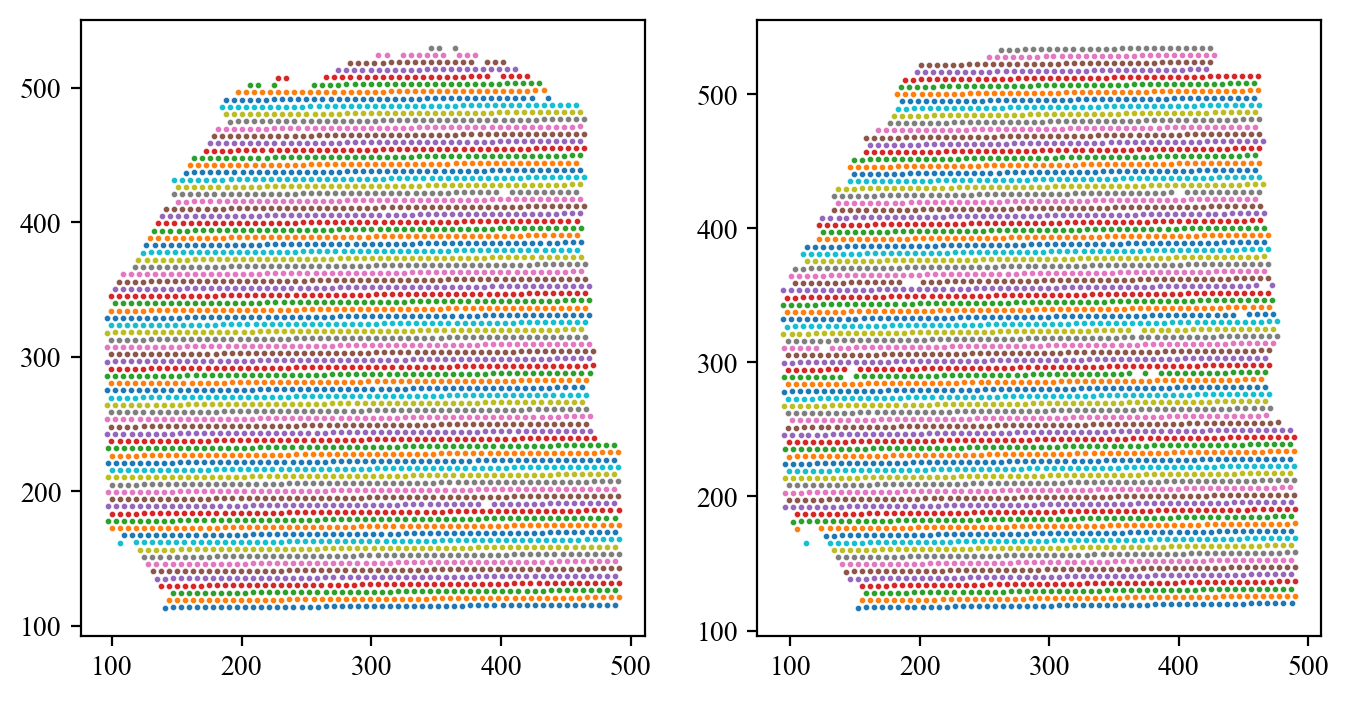

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
slice1.keys()
fig,ax = plt.subplots(1,2,dpi=200,figsize=(8,4))
for line in slice1['Position']:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=5,ax=ax[0])
for line in slice2['Position']:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=5,ax=ax[1])

In [65]:
len(slice1['Position']),len(slice2['Position'])
slice1_pos = slice1['Position']
slice2_pos = slice2['Position']
scale_max=[min(np.max(slice1['Position'][i][:,0]),np.max(slice2['Position'][i][:,0])) for i in range(len(slice1['Position']))]
scale_min=[max(np.min(slice1['Position'][i][:,0]),np.min(slice2['Position'][i][:,0])) for i in range(len(slice1['Position']))]
scale = list(zip(scale_min,scale_max))
scale

[(152.56131394618006, 487.1090882230344),
 (155.58384292751322, 490.13161720436756),
 (158.65137531411838, 486.98867966343226),
 (155.46343436791108, 490.0565262381805),
 (146.11034108757838, 486.8685852919732),
 (142.9674035466431, 489.9361176785784),
 (139.82478019385087, 486.7931801376431),
 (136.68184265291558, 489.8157091189762),
 (133.53921930012336, 486.673085766184),
 (111.76550035285284, 489.69561474751714),
 (127.20865500112382, 486.55267720658185),
 (105.47962527098228, 489.57520618791494),
 (102.33700191819004, 486.43258283512273),
 (105.35953089952318, 489.50011522172787),
 (96.95641325070916, 486.3121742755206),
 (100.04285356666237, 489.3797066621257),
 (96.9187104438457, 486.2370833093335),
 (99.96014653198172, 489.25961229066667),
 (96.83616050419367, 486.1166747497314),
 (99.92260082014685, 489.13920373106447),
 (96.75345346951305, 485.99658037827226),
 (99.83989378546623, 489.0641127648774),
 (96.7157506626496, 485.8761718186702),
 (99.7571867507856, 471.533342467764

In [97]:
slice1_pos = copy.deepcopy(slice1['Position'])
slice2_pos = copy.deepcopy(slice2['Position'])
values = [slice1_pos[0][i] for i in range(len(slice1_pos[0])) if scale[0][0]<= slice1_pos[0][i][0] <= scale[0][1]]
cutted_pos1 = []
cutted_pos2 = []
for n in range(len(slice1_pos)):
    cutted_pos1.append(np.array([slice1_pos[n][i] for i in range(len(slice1_pos[n])) if scale[n][0]<= slice1_pos[n][i][0] <= scale[n][1]]))
for n in range(len(slice2_pos)):
    cutted_pos2.append(np.array([slice2_pos[n][i] for i in range(len(slice2_pos[n])) if scale[n][0]<= slice2_pos[n][i][0] <= scale[n][1]]))


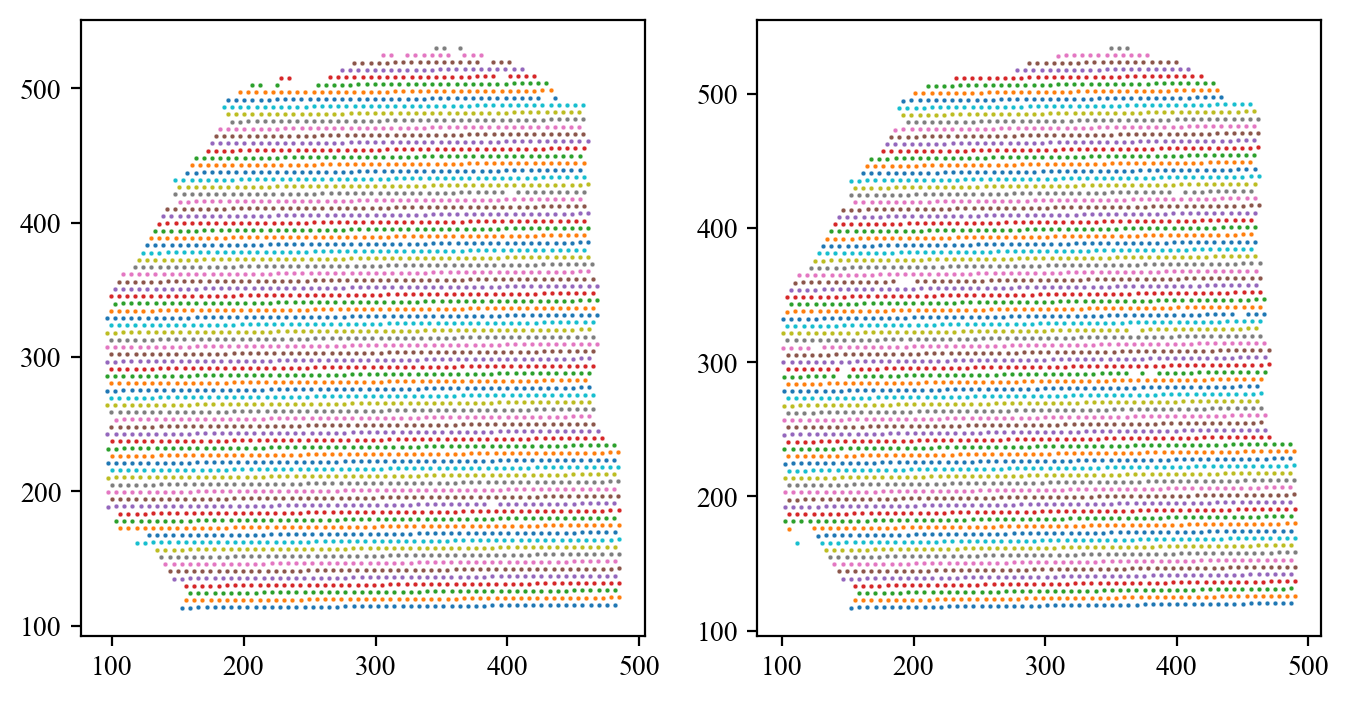

In [98]:
fig,ax = plt.subplots(1,2,dpi=200,figsize=(8,4))
for line in cutted_pos1:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=3,ax=ax[0])
for line in cutted_pos2:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=3,ax=ax[1])   

In [89]:
sns.scatterplot(cutted_pos)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

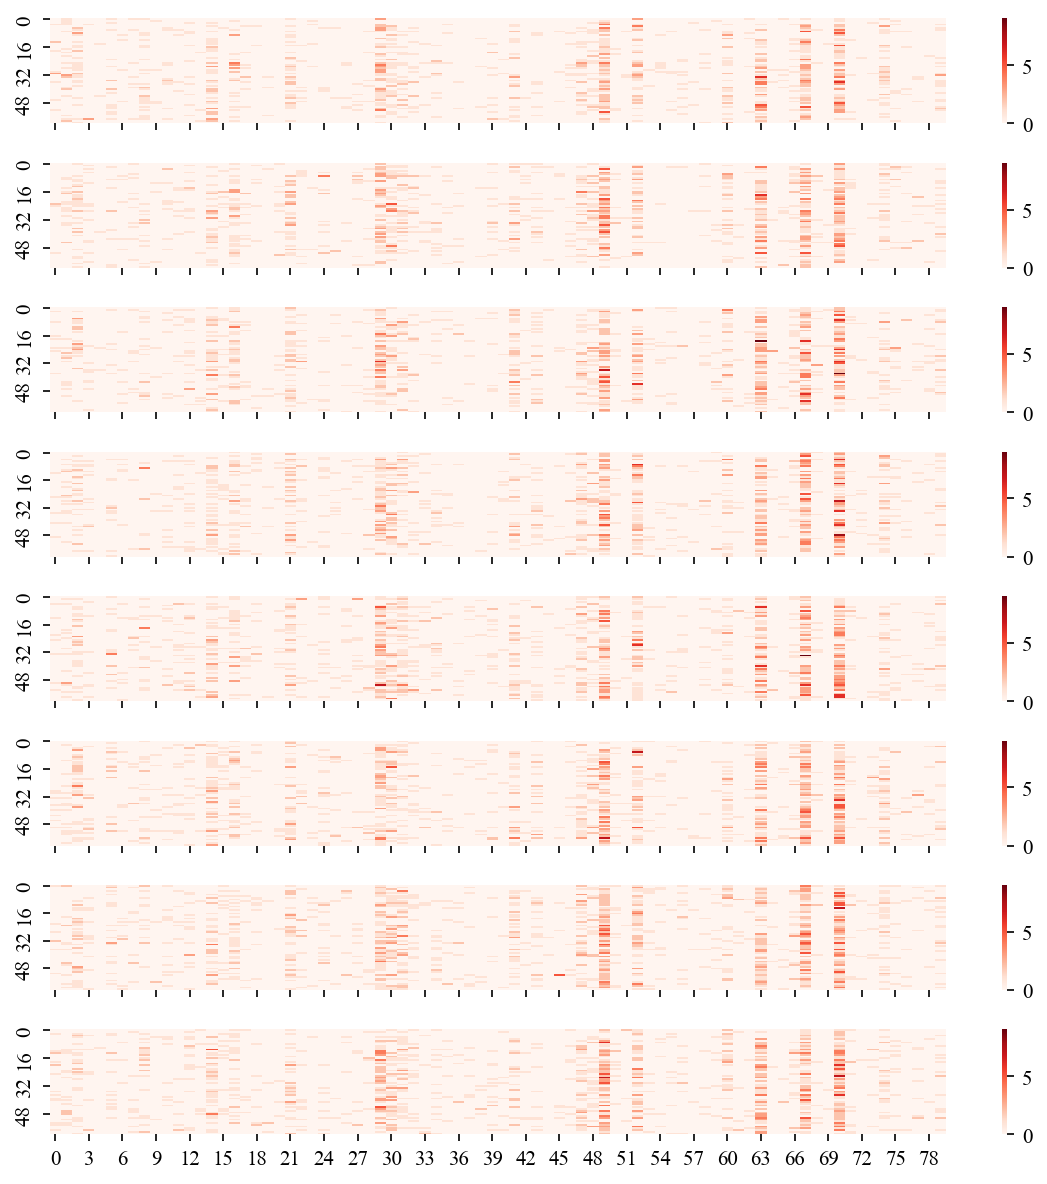

In [4]:

fig,ax = plt.subplots(8,1,dpi=150,figsize=[8,8],sharex=True)
for i in range(len(ax)):
    ax[i].set_xticks([])
    sns.heatmap(slice1['Gene_features'][i+30][:,:80],cmap='Reds',ax=ax[i],vmin=0,vmax=9)
plt.tight_layout()


In [5]:
sample_size=50
x, y = np.meshgrid(np.linspace(0, 100, 100), np.linspace(0, 100, 100))
# 定义扭曲函数
def nonlinear_transformation(x, y):
    x_new = x ** 2 + y ** 2
    y_new = x * y
    return x_new, y_new

# 对网格进行扭曲
x_new, y_new = nonlinear_transformation(x, y)


In [6]:
x

array([[  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ],
       [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ],
       [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ],
       ...,
       [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ],
       [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ],
       [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ]])

<Axes: >

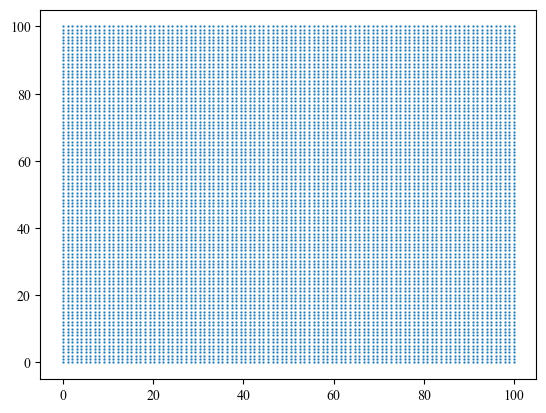

In [7]:
sns.scatterplot(x=np.squeeze(np.reshape(x,-1)),y=np.squeeze(np.reshape(y,-1)),s=3)

<Axes: >

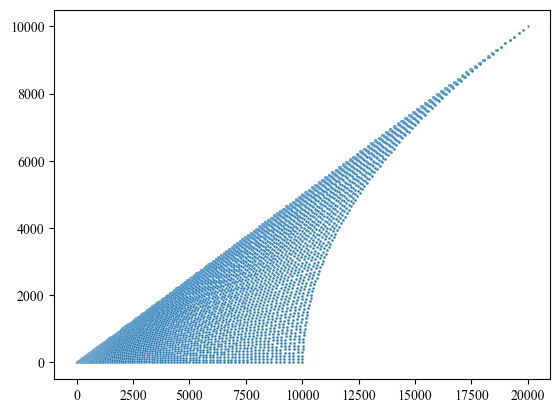

In [8]:
sns.scatterplot(x=np.squeeze(np.reshape(x_new,-1)),y=np.squeeze(np.reshape(y_new,-1)),s=3)

In [13]:
x, y = np.meshgrid(np.linspace(0, 100, 100), np.linspace(0, 100, 100))
x_ = copy.deepcopy(x)
y_ = copy.deepcopy(y)
x_ += np.random.normal(0, 0.01, size=x.shape)
y_ += np.random.normal(0, 0.01, size=y.shape)
flatten = lambda x:x.reshape(-1)


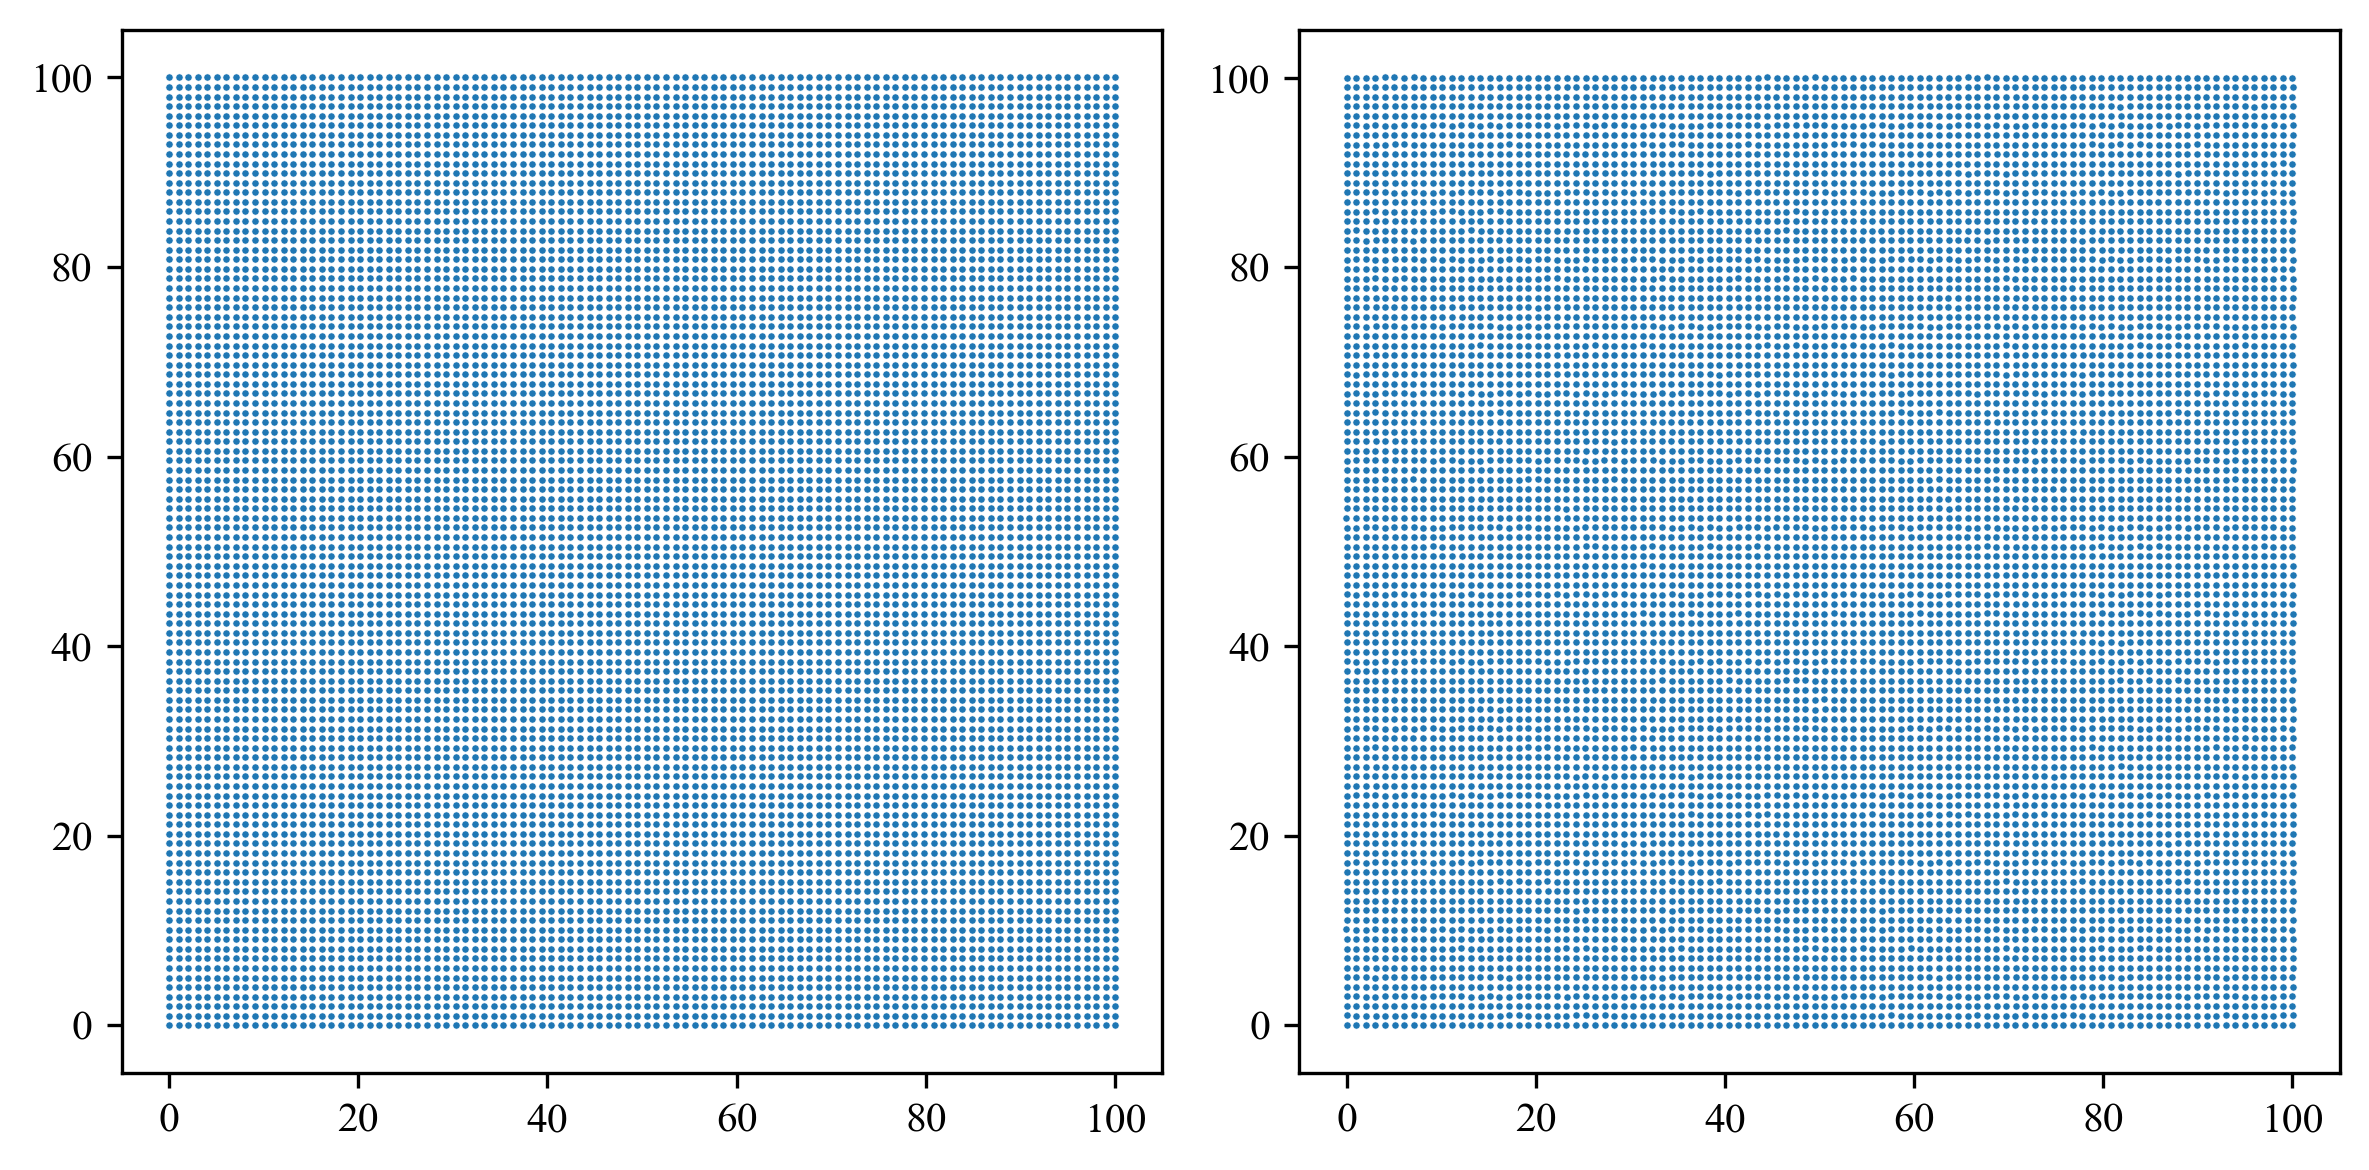

In [14]:
fig,ax = plt.subplots(1,2,dpi=300,figsize=[8,4])
sns.scatterplot(x=flatten(x),y=flatten(y),s=3,ax=ax[0])
sns.scatterplot(x=flatten(x_),y=flatten(y_),s=3,ax=ax[1])
plt.tight_layout()